    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


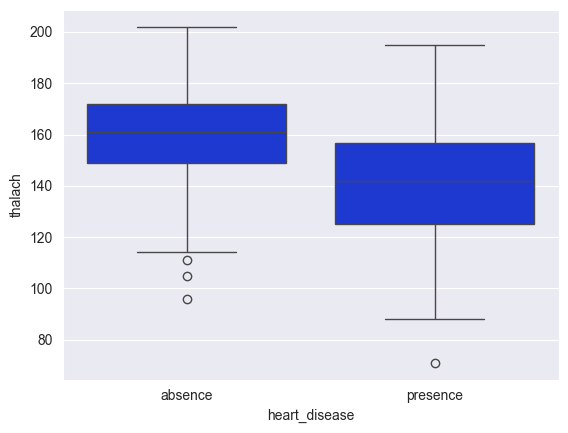

    age     sex  trestbps   chol            cp  exang  fbs  thalach  \
1  67.0    male     160.0  286.0  asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0  asymptomatic    1.0  0.0    129.0   
6  62.0  female     140.0  268.0  asymptomatic    0.0  0.0    160.0   
8  63.0    male     130.0  254.0  asymptomatic    0.0  0.0    147.0   
9  53.0    male     140.0  203.0  asymptomatic    1.0  1.0    155.0   

  heart_disease  
1      presence  
2      presence  
6      presence  
8      presence  
9      presence  
    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   
5  56.0    male     120.0  236.0   atypical angina    0.0  0.0    178.0   
7  57.0  female     120.0  354.0      asymptomatic    1.0  0.0    163.0   

  heart_diseas

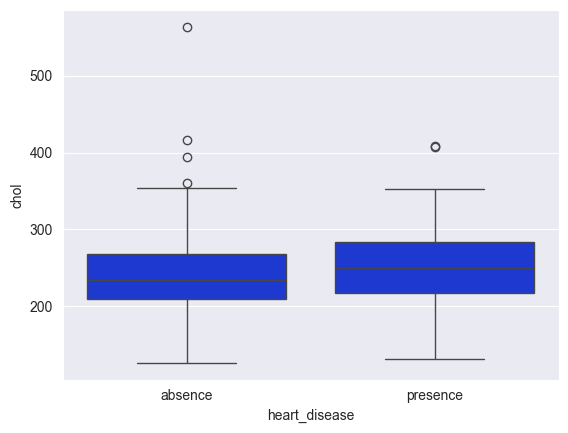

The diff in avg cholesterol is 8.834576241445887
The diff in median cholesterol is 14.5
0.13914167020436527
The p_value is 0.13914167020436527 which is above 0.05 so we accept the null hypothesis


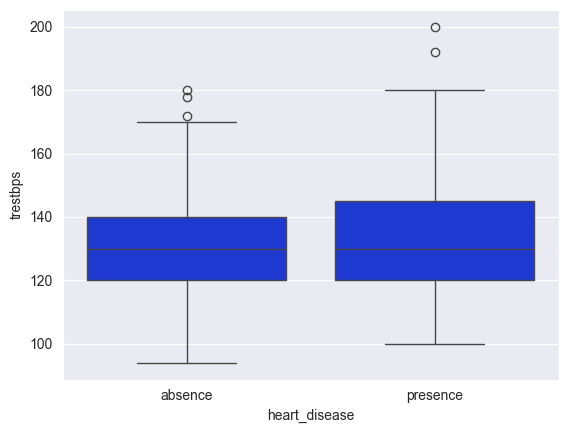

The diff in avg resting blood pressure is 5.318345323740999
The diff in median resting blood pressure is 0.0
0.008548268928594928
The p_value is 0.008548268928594928 which is less than 0.05 so we reject the null hypothesis


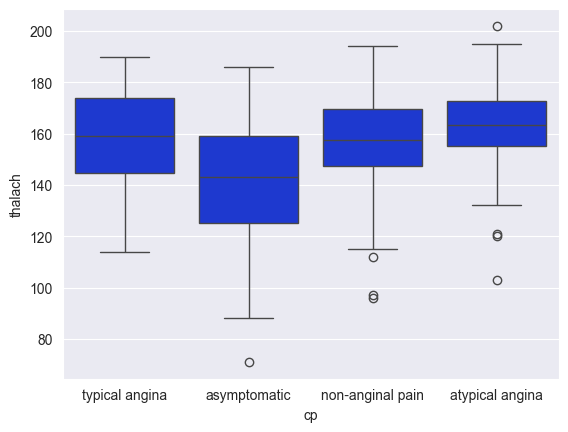

The avg of typical angina is 155.96
The avg of asymptomatic is 140.68
The avg of non-anginal pain is 155.41
The avg of atypical angina is 162.42
1.9065505247705742e-10
The p_value is less that 0.05, which means we reject the null hypothesis
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------
The asymptomatic ha

<Figure size 640x480 with 0 Axes>

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

# load data
heart = pd.read_csv('heart_disease.csv')
print(heart.head())

# set plots style
sns.set_style('darkgrid')
sns.set_palette('winter')
# plot heart_disease blood pressure
sns.boxplot(data=heart, x='heart_disease', y='thalach')
plt.show()
plt.clf()
# save heart_disease_data
thalach_hd = heart[heart['heart_disease'] == 'presence']
thalach_no_hd = heart[heart['heart_disease'] == 'absence']
print(thalach_hd.head())
print(thalach_no_hd.head())
# averages & medians hd 
avg_hd = thalach_hd['thalach'].mean()
avg_no_hd = thalach_no_hd['thalach'].mean()
diff_hd_avg = avg_hd - avg_no_hd
print(f'The diff in avg heart rate is {diff_hd_avg}')
med_hd = thalach_hd['thalach'].median()
med_no_hd = thalach_no_hd['thalach'].median()
diff_hd_median = med_hd - med_no_hd
print(f'The diff in avg heart rate is {diff_hd_median}')
# two sample t-test for blood pressure between heart diseace patients 
# Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
# Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.
thalach_presence = heart.thalach[heart['heart_disease'] == 'presence']
thalach_absence = heart.thalach[heart['heart_disease'] == 'absence']
tstat, pval = ttest_ind(thalach_presence, thalach_absence)
print(pval)
print(f'The p_value is {pval} which is below 0.05 so we reject the null hypothesis')


# plot heart_disease cholesterol
sns.boxplot(data=heart, x='heart_disease', y='chol')
plt.show()
plt.clf()
# averages & medians chol
avg_hd_chol = thalach_hd['chol'].mean()
avg_no_hd_chol = thalach_no_hd['chol'].mean()
diff_hd_avg_chol = avg_hd_chol - avg_no_hd_chol
print(f'The diff in avg cholesterol is {diff_hd_avg_chol}')
med_hd_chol = thalach_hd['chol'].median()
med_no_hd_chol = thalach_no_hd['chol'].median()
diff_hd_median_chol = med_hd_chol - med_no_hd_chol
print(f'The diff in median cholesterol is {diff_hd_median_chol}')
# two sample t-test for cholesterol between heart diseace patients
# Null: The average cholesterol for a person with heart disease is equal to the average cholesterol for a person without heart disease.
# Alternative: The average cholesterol for a person with heart disease is NOT equal to the average cholesterol for a person without heart disease.
chol_presence = heart.chol[heart['heart_disease'] == 'presence']
chol_absence = heart.chol[heart['heart_disease'] == 'absence']
tstat, pval = ttest_ind(chol_presence, chol_absence)
print(pval)
print(f'The p_value is {pval} which is above 0.05 so we accept the null hypothesis')


# plot heart_disease trestbps
sns.boxplot(data=heart, x='heart_disease', y='trestbps')
plt.show()
plt.clf()
# averages & medians trestbps
avg_hd_trestbps = thalach_hd['trestbps'].mean()
avg_no_hd_trestbps = thalach_no_hd['trestbps'].mean()
diff_hd_avg_trestbps = avg_hd_trestbps - avg_no_hd_trestbps
print(f'The diff in avg resting blood pressure is {diff_hd_avg_trestbps}')
med_hd_trestbps = thalach_hd['trestbps'].median()
med_no_hd_trestbps = thalach_no_hd['trestbps'].median()
diff_hd_median_trestbps = med_hd_trestbps - med_no_hd_trestbps
print(f'The diff in median resting blood pressure is {diff_hd_median_trestbps}')
# two sample t-test for blood pressure between heart diseace patients
# Null: The average blood pressure for a person with heart disease is equal to the average blood pressure for a person without heart disease.
# Alternative: The average blood pressure for a person with heart disease is NOT equal to the average blood pressure for a person without heart disease.
trestbps_presence = heart.trestbps[heart['heart_disease'] == 'presence']
trestbps_absence = heart.trestbps[heart['heart_disease'] == 'absence']
tstat, pval = ttest_ind(trestbps_presence, trestbps_absence)
print(pval)
print(f'The p_value is {pval} which is less than 0.05 so we reject the null hypothesis')

# plot heart rate and type of heart pain
sns.boxplot(data=heart, x='cp', y='thalach')
plt.show()
plt.clf()
for items in heart['cp'].unique():
  heart_df = heart[heart['cp'] == items]
  heart_df_avg = round(heart_df['thalach'].mean(),2)
  print(f'The avg of {items} is {heart_df_avg}')
# Anova test for heart and heart pain
# Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
# Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.
thalach_typical = heart.thalach[heart['cp'] == 'typical angina']
thalach_asymtom = heart.thalach[heart['cp'] == 'asymptomatic']
thalach_nonangin = heart.thalach[heart['cp'] == 'non-anginal pain']
thalach_atypical = heart.thalach[heart['cp'] == 'atypical angina']
fstat, pval = f_oneway(thalach_typical,thalach_asymtom,thalach_nonangin,thalach_atypical)
print(pval)
print("The p_value is less that 0.05, which means we reject the null hypothesis")
# Tunkey test for heart and heart pain
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05) 
print(tukey_results)
print("The asymptomatic have sig differences with atypical agina, non anginal pain and typical angina")


# Crosstab & Chi_square
# Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
# Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)
print("The p_value is less that 0.05 so we reject the null hypothesis")
